['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']


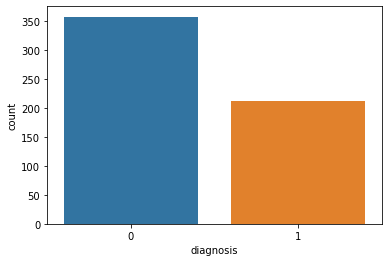

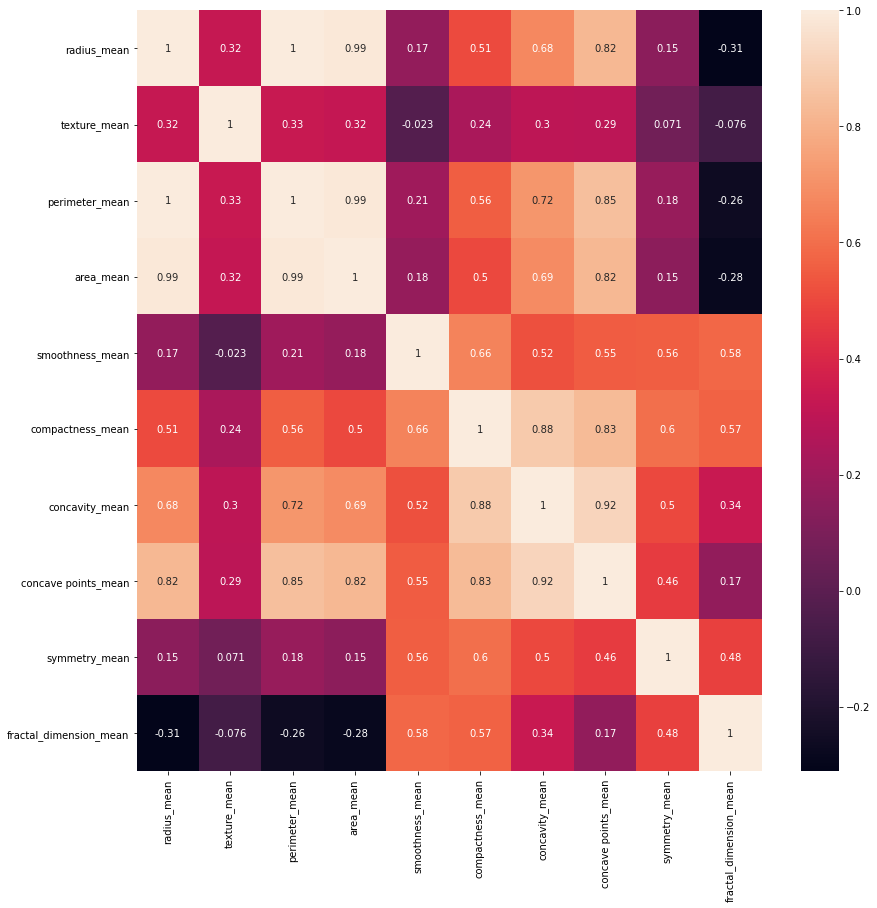

train_x:
     radius_mean  texture_mean  smoothness_mean  compactness_mean  \
59         8.618         11.79          0.09752           0.05272   
477       13.900         16.62          0.06828           0.05319   
268       12.870         16.21          0.09425           0.06219   
35        16.740         21.59          0.09610           0.13360   
495       14.870         20.21          0.09587           0.08345   
..           ...           ...              ...               ...   
412        9.397         21.68          0.07969           0.06053   
228       12.620         23.97          0.07903           0.07529   
410       11.360         17.57          0.08858           0.05313   
295       13.770         13.27          0.09198           0.06221   
71         8.888         14.64          0.09783           0.15310   

     symmetry_mean  fractal_dimension_mean  
59          0.1683                 0.07187  
477         0.1813                 0.05536  
268         0.2010         

In [27]:
import pandas as pd
from sklearn import svm
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
# 加载数据集，你需要把数据放到目录中
data = pd.read_csv('data/breast_cancer_data/data.csv')
# 数据探索
# 因为数据集中列比较多，我们需要把dataframe中的列全部显示出来
pd.set_option('display.max_columns',None)
# print(data.columns)
# print(data.head(5))
# print(data.describe())

# 数据清洗
# 将特征字段分成3组
#切割字段2~12，12-22,22-32
features_mean = list(data.columns[2:12])
print(features_mean)
features_se = list(data.columns[12:22])
features_worst = list(data.columns[22:32])
# 开始清洗
# ID列没有用，删除改列
data.drop('id',axis=1,inplace=True)
# 将B两性替换为0，M恶行替换为1
data['diagnosis']=data['diagnosis'].map({'M':1,'B':0})

# 特征字段筛选
# 将肿瘤诊断结果可视化
sns.countplot(data['diagnosis'],label='Count')
plt.show()
# 用热力图呈现features_mean字段之间的相关性
corr = data[features_mean].corr()
plt.figure(figsize=(14,14))
# annot=True显示每个方格的数据
sns.heatmap(corr,annot=True)
plt.show()

# 特征选择
# 根据热力图，去掉相关性大的几个特征，仅保留一个即可
features_remain = ['radius_mean', 'texture_mean', 'smoothness_mean', 'compactness_mean', 'symmetry_mean', 'fractal_dimension_mean']

# 准备训练集和测试集
# 抽取30%的数据作为测试集，其余作为训练集
train,test = train_test_split(data,test_size=0.3) # in this our main data is splitted into train and test
# 抽取特征选择的数值作为训练和测试数据
train_x = train[features_remain]
train_y = train['diagnosis']
test_x = test[features_remain]
test_y = test['diagnosis']
print(f'train_x:\n{train_x}\ntrain_y:\n{train_y}\ntest_x:\n{test_x}\n test_y:\n{test_y}\n')